In [11]:
import warnings
warnings.filterwarnings('ignore')
import pickle
from test_map import filter_detections_by_width, compute_mean_average_precision
from tsr_helpers import print_executed

MODEL_NAME = 'hog_svm'
print_executed()


Detections:  <class 'list'> 25
Keys: 
file
file_path
gt_classes
gt_bboxes
pred_classes
pred_bboxes
confidences
0 50
20
50 70
8
70 416
3
Large:  3
Small:  15
Medium:  7
Overall:  25
EXECUTED AT 2019-05-31 18:43:53.376603


In [ ]:
# Open file with detections
with open('/Users/michal/PycharmProjects/HOG_TSR/dataset/test_images/output/detections_output_result.pkl',
          'rb') as pickle_file:
    detections = pickle.load(pickle_file)
    
''' 
This is format of results pickle:    
<class 'list'> of dictionaries that kind:
dict_keys(['pred_classes', 'pred_bboxes', 'gt_bboxes', 'file_path', 'gt_classes', 'file', 'confidences']) 
{'pred_classes': [3, 1],
'pred_bboxes': [(736, 413, 768, 445), (742, 461, 765, 485)], 
'gt_bboxes': [(742, 443, 765, 466), (742, 466, 764, 489), (737, 412, 769, 443)], 
'file_path': '/media/arcos/Shared/Datasets/GermanTSDataset/Detection/00003.jpg', 
'gt_classes': [1, 1, 3], 
'file': '00003.jpg', 
'confidences': [0.9937791, 0.88522387]} 
'''
  
print("Detections: ", type(detections), len(detections))
print("Keys: ")
for i in detections[0].keys():
    print(i)

# Set categories and indices
categories = [{'id': 1, 'name': 'sign'}]
category_index = {1: categories[0]}

print_executed()


In [ ]:
# Determine division of bboxes - small, medium, large = ab, bc, cd
a = 0
b = 50
c = 70
d = 416

# Do division
detections_small = filter_detections_by_width(detections, a, b)
detections_medium = filter_detections_by_width(detections, b, c)
detections_large = filter_detections_by_width(detections, c, d)

print('Large: ', len(detections_large))
print('Small: ', len(detections_small))
print('Medium: ', len(detections_medium))
print('Overall: ', len(detections))

print_executed()


IoU threshold set to: 0.10
TP: 12.0
FP: 31.0
FN: 19.0
Avg. overlap for sign = 0.3349
Precision for sign = 0.2791
Recall for sign = 0.3871
AP for sign = 0.1442
Mean AP = 0.1442
~~~~~~~~
Results:
  class  precision    recall       ap
0  sign    0.27907  0.387097  0.14416
----- Small detections -----
IoU threshold set to: 0.10
TP: 2.0
FP: 19.0
FN: 18.0
Avg. overlap for sign = 0.1911
Precision for sign = 0.0952
Recall for sign = 0.1000
AP for sign = 0.0178
Mean AP = 0.0178
~~~~~~~~
Results:
  class  precision  recall        ap
0  sign   0.095238     0.1  0.017814
----- Medium detections -----
IoU threshold set to: 0.10
TP: 7.0
FP: 7.0
FN: 1.0
Avg. overlap for sign = 0.3719
Precision for sign = 0.5000
Recall for sign = 0.8750
AP for sign = 0.4375
Mean AP = 0.4375
~~~~~~~~
Results:
  class  precision  recall      ap
0  sign        0.5   0.875  0.4375
----- Large detections -----
IoU threshold set to: 0.10
TP: 3.0
FP: 10.0
FN: 0.0
Avg. overlap for sign = 0.3446
Precision for sign = 0.2308
Rec

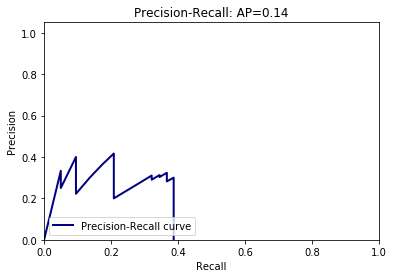

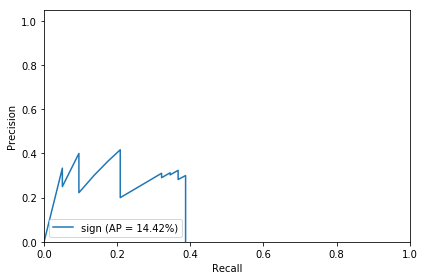

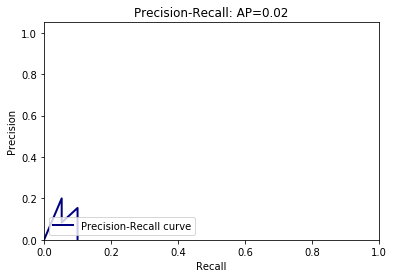

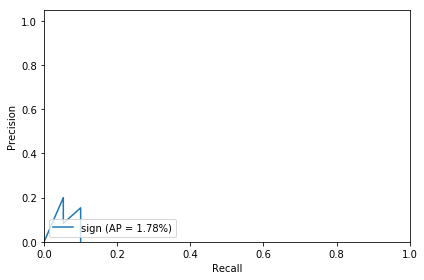

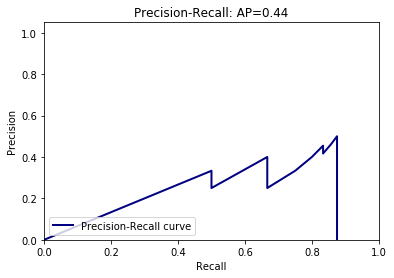

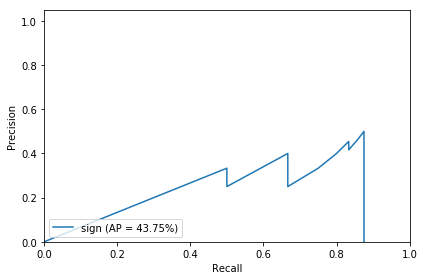

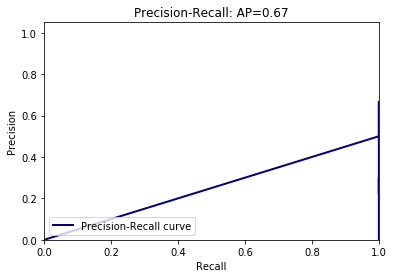

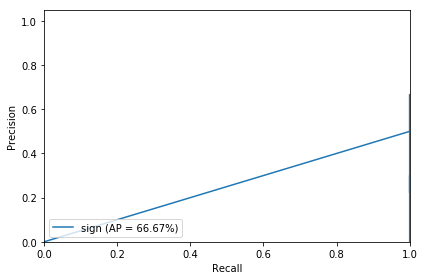

0.6666666666666666

<Figure size 432x288 with 0 Axes>

In [12]:
# Calculate mean average precision
path = '/Users/michal/PycharmProjects/HOG_TSR/dataset/test_images/output/'
print("----- Small detections -----")
compute_mean_average_precision(detections, categories, category_index, path, MODEL_NAME + "_all")
print("\n\n\n----- Small detections -----")
compute_mean_average_precision(detections_small, categories, category_index, path, MODEL_NAME + "_small")
print("\n\n\n----- Medium detections -----")
compute_mean_average_precision(detections_medium, categories, category_index, path, MODEL_NAME + "_medium")
print("\n\n\n----- Large detections -----")
compute_mean_average_precision(detections_large, categories, category_index, path, MODEL_NAME + "_large")

print_executed()

